In [1]:
%%time
import malaya

CPU times: user 10.4 s, sys: 640 ms, total: 11 s
Wall time: 11 s


In [2]:
anger_text = 'aku cukup tak suka budak gemuk tu'
fear_text = 'saya takut dengan hantu'
joy_text = 'gembiranya hari ni, dapat jumpa crush'
love_text = 'saya terlalu cintakan dia'
sadness_text = 'kawan rapat aku putuskan hubungan'
surprise_text = 'terharu aku harini, semua orang cakap selamat hari jadi'

All models got `get_proba` parameters.
If True, it will returned probability every classes. Else, it will return highest probability class. **Default is True.**

## Load multinomial model

In [3]:
model = malaya.emotion.multinomial()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

anger
{'anger': 0.27993946463423486, 'fear': 0.1482931513658756, 'joy': 0.1880009584798728, 'love': 0.21711876657658918, 'sadness': 0.1296730712078804, 'surprise': 0.03697458773554805}


['anger', 'fear', 'joy', 'joy', 'sadness', 'fear']

## Load xgb model

In [4]:
model = malaya.emotion.xgb()
print(model.predict(anger_text))
print(model.predict(anger_text,get_proba=True))
model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text],get_proba=True)

love
{'anger': 0.21755809, 'fear': 0.090371706, 'joy': 0.13347618, 'love': 0.47302967, 'sadness': 0.0770047, 'surprise': 0.008559667}


[{'anger': 0.21755809,
  'fear': 0.090371706,
  'joy': 0.13347618,
  'love': 0.47302967,
  'sadness': 0.0770047,
  'surprise': 0.008559667},
 {'anger': 0.013483193,
  'fear': 0.939588,
  'joy': 0.01674833,
  'love': 0.003220023,
  'sadness': 0.022906518,
  'surprise': 0.0040539484},
 {'anger': 0.09142393,
  'fear': 0.029400537,
  'joy': 0.78257465,
  'love': 0.02881839,
  'sadness': 0.058004435,
  'surprise': 0.009778041},
 {'anger': 0.11640434,
  'fear': 0.097485565,
  'joy': 0.24893147,
  'love': 0.25440857,
  'sadness': 0.2650988,
  'surprise': 0.01767122},
 {'anger': 0.27124837,
  'fear': 0.15662362,
  'joy': 0.131251,
  'love': 0.022184724,
  'sadness': 0.41255626,
  'surprise': 0.006135965},
 {'anger': 0.0714585,
  'fear': 0.19790031,
  'joy': 0.037659157,
  'love': 0.0025473926,
  'sadness': 0.00772799,
  'surprise': 0.6827066}]

## List available deep learning models

In [5]:
malaya.emotion.available_deep_model()

['fast-text',
 'hierarchical',
 'bahdanau',
 'luong',
 'bidirectional',
 'bert',
 'entity-network']

In [16]:
for i in malaya.emotion.available_deep_model():
    print('Testing %s model'%(i))
    model = malaya.emotion.deep_model(i)
    print(model.predict(anger_text))
    print(model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text]))
    print(model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text], get_proba = True))
    print()

Testing fast-text model
love
['love', 'fear', 'joy', 'love', 'sadness', 'surprise']
[{'anger': 2.978304e-06, 'fear': 1.8461518e-10, 'joy': 1.0204276e-09, 'love': 0.999997, 'sadness': 1.3693535e-09, 'surprise': 2.6386826e-09}, {'anger': 1.2210384e-18, 'fear': 1.0, 'joy': 1.0015556e-19, 'love': 1.8750202e-24, 'sadness': 6.976661e-21, 'surprise': 3.2600536e-15}, {'anger': 2.47199e-19, 'fear': 2.3032567e-22, 'joy': 1.0, 'love': 5.1478095e-14, 'sadness': 4.464682e-20, 'surprise': 1.588908e-15}, {'anger': 4.1249185e-11, 'fear': 1.7474476e-10, 'joy': 0.00022258118, 'love': 0.9997774, 'sadness': 1.6592432e-11, 'surprise': 4.1854236e-09}, {'anger': 4.3972154e-08, 'fear': 2.1118221e-06, 'joy': 3.4898858e-07, 'love': 4.5489975e-12, 'sadness': 0.9999975, 'surprise': 4.8414757e-09}, {'anger': 1.1130476e-23, 'fear': 0.0003273876, 'joy': 5.694222e-17, 'love': 1.9363045e-25, 'sadness': 1.4252974e-26, 'surprise': 0.99967265}]

Testing hierarchical model
joy
['anger', 'fear', 'joy', 'joy', 'sadness', 'j

## Unsupervised important words learning

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # i just really like seaborn colors

We need to set `get_proba` become True to get the 'attention'.

#### Visualizing bahdanau model

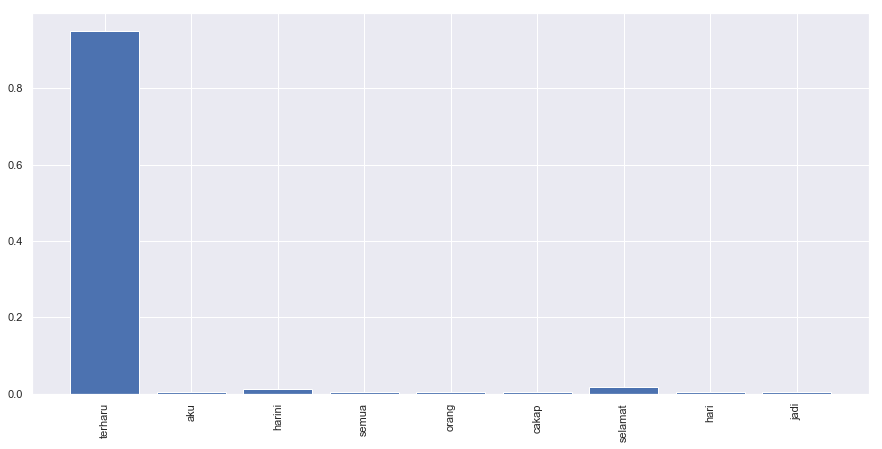

In [8]:
model = malaya.emotion.deep_model('bahdanau')
result = model.predict(surprise_text, get_proba = True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing luong model

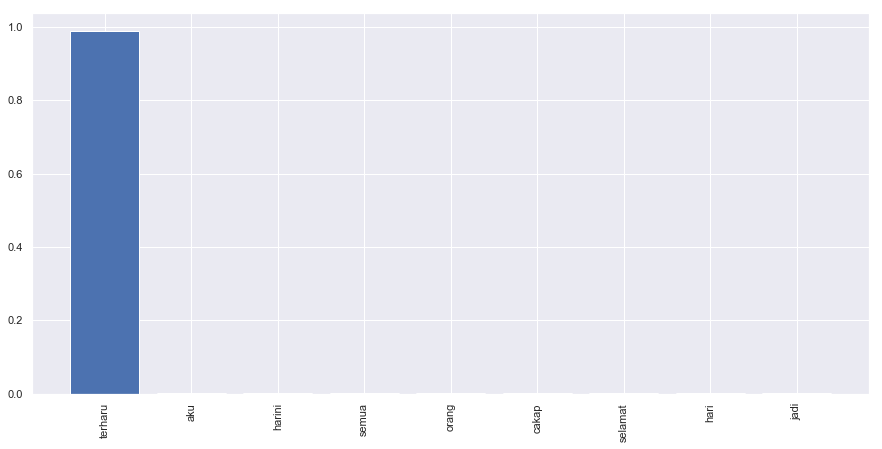

In [9]:
model = malaya.emotion.deep_model('luong')
result = model.predict(surprise_text, get_proba = True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

#### Visualizing hierarchical model

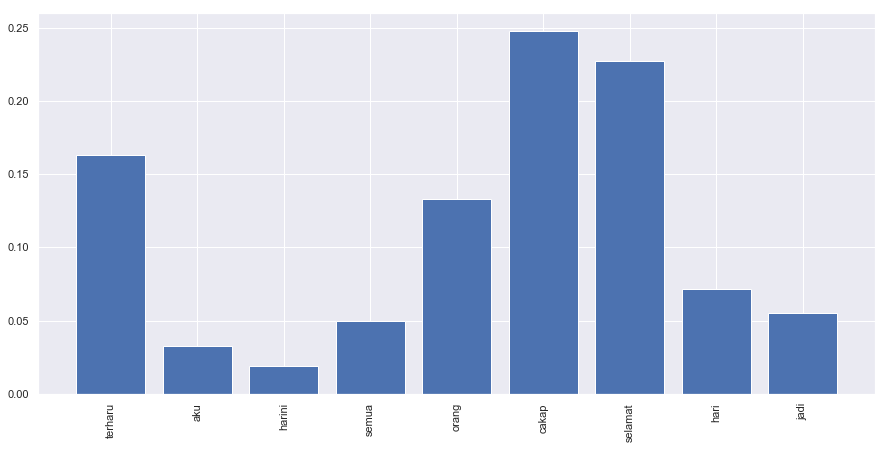

In [10]:
model = malaya.emotion.deep_model('hierarchical')
result = model.predict(surprise_text, get_proba=True)['attention']

plt.figure(figsize = (15, 7))
labels = [r[0] for r in result]
val = [r[1] for r in result]
aranged = [i for i in range(len(labels))]
plt.bar(aranged, val)
plt.xticks(aranged, labels, rotation = 'vertical')
plt.show()

## Load Sparse deep learning models

What happen if a word not included in the dictionary of the models? like `setan`, what if `setan` appeared in text we want to classify? We found this problem when classifying social media texts / posts. Words used not really a vocabulary-based contextual.

Malaya will treat **unknown words** as `<UNK>`, so, to solve this problem, we need to use N-grams character based. Malaya chose tri-grams until fifth-grams.

```python
setan = ['set', 'eta', 'tan']
```

Sklearn provided easy interface to use n-grams, problem is, it is very sparse, a lot of zeros and not memory efficient. Sklearn returned sparse matrix for the result, lucky Tensorflow already provided some sparse function.

In [11]:
malaya.emotion.available_sparse_deep_model()

['fast-text-char']

Right now Malaya only provide 1 sparse model, `fast-text-char`. We will try to evolve it.

In [12]:
sparse_model = malaya.emotion.sparse_deep_model()

INFO:tensorflow:Restoring parameters from /Users/huseinzol/Malaya/emotion/fast-text-char/model.ckpt


In [13]:
sparse_model.predict(sadness_text)

'sadness'

In [14]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text])

['love', 'fear', 'joy', 'love', 'sadness', 'fear']

In [15]:
sparse_model.predict_batch([anger_text,
                    fear_text,
                    joy_text,
                    love_text,
                    sadness_text,
                    surprise_text], get_proba = True)

[{'anger': 0.055561937,
  'fear': 0.034661848,
  'joy': 0.20765074,
  'love': 0.65774184,
  'sadness': 0.0210206,
  'surprise': 0.023363067},
 {'anger': 1.5065236e-05,
  'fear': 0.9998666,
  'joy': 6.3056427e-06,
  'love': 2.9068442e-06,
  'sadness': 3.6798014e-05,
  'surprise': 7.235542e-05},
 {'anger': 0.00097060547,
  'fear': 5.1922354e-05,
  'joy': 0.99052715,
  'love': 0.0024538564,
  'sadness': 0.0005109437,
  'surprise': 0.005485538},
 {'anger': 0.00014133049,
  'fear': 0.0004463539,
  'joy': 0.12486383,
  'love': 0.87307847,
  'sadness': 0.0013382707,
  'surprise': 0.0001317923},
 {'anger': 0.0077239843,
  'fear': 0.014800851,
  'joy': 0.008525367,
  'love': 0.0013007816,
  'sadness': 0.9655128,
  'surprise': 0.0021361646},
 {'anger': 0.0003960413,
  'fear': 0.6634573,
  'joy': 0.0014801685,
  'love': 0.00056572456,
  'sadness': 0.000516784,
  'surprise': 0.33358407}]